In [4]:
import pandas as pd
import numpy as np
import networkx as nx

# 读取数据集

In [10]:
g = nx.from_edgelist(
    [list(x) for x in pd.read_csv('./社交账号网络分类挑战赛公开数据/edges.csv').values]
)

In [52]:
train = pd.read_csv('./社交账号网络分类挑战赛公开数据/train.csv')
test = pd.read_csv('./社交账号网络分类挑战赛公开数据/test.csv')

In [30]:
train.head()

,id,target
0,00016152-de40-49ac-b6e4-c5b75dc0fdf6,0
1,00047bda-ef4b-449b-be80-8be3ca2f7098,0
2,0006989a-e6ce-486d-ba9d-f8d64ba47c66,1
3,00078ea1-f3dc-4788-96fa-2bc19f2bc73e,1
4,00096f7d-def7-431d-9627-af690217c697,0


# 分析数据

In [12]:
len(g.nodes()), len(g.edges())

(37700, 289003)

In [14]:
list(g.nodes())[:2]

['00004509-7c0b-41d8-bef4-30d85c1de29d',
 '0e725983-f894-4dc1-aada-34b6c8775799']

In [15]:
g.neighbors('00004509-7c0b-41d8-bef4-30d85c1de29d')

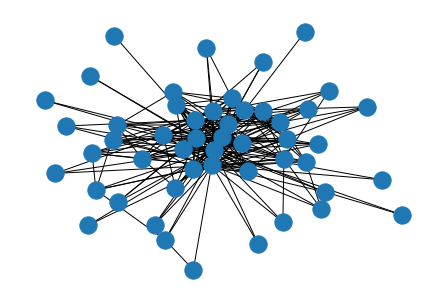

In [28]:
neighbors = list(nx.traversal.dfs_tree(g, '00004509-7c0b-41d8-bef4-30d85c1de29d', 2))
nx.draw(g.subgraph(neighbors[:50]))

# Node Classification by NetworkX

In [33]:
for node, label in zip(train["id"].iloc[:-1000], train["target"].iloc[:-1000]):
    g.nodes[node]["label"] = label

In [34]:
from networkx.algorithms import node_classification

In [36]:
harmonic_pred = node_classification.harmonic_function(g)

In [42]:
harmonic_pred = pd.merge(
    pd.DataFrame({'id': g.nodes(), 'pred': harmonic_pred}),
    train, on='id'
)

In [45]:
(harmonic_pred.iloc[-1000:]['pred'] == harmonic_pred.iloc[-1000:]['target']).mean()

0.958

In [46]:
local_and_global_pred = node_classification.local_and_global_consistency(g)

In [47]:
local_and_global_pred = pd.merge(
    pd.DataFrame({'id': g.nodes(), 'pred': local_and_global_pred}),
    train, on='id'
)

In [49]:
(local_and_global_pred.iloc[-1000:]['pred'] == local_and_global_pred.iloc[-1000:]['target']).mean()

0.739

# 模型预测

In [55]:
harmonic_pred = node_classification.harmonic_function(g)

harmonic_pred = pd.merge(
    pd.DataFrame({'id': g.nodes(), 'target': harmonic_pred}),
    test, on='id'
)

In [57]:
harmonic_pred['target'].value_counts()

0    8766
1    1234
Name: target, dtype: int64

In [58]:
harmonic_pred.to_csv('sub.csv', index=None)